In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

classicos = pd.read_csv(r'H:\Meu Drive\Dissertacao\Notebook\Análise Inicial dos Métodos Estudados\Resultados\algoritmos_classicos.csv')
random_sampling = pd.read_csv(r'H:\Meu Drive\Dissertacao\Notebook\Análise Inicial dos Métodos Estudados\Resultados\melhores_modelos.csv')
extensoes_ensemble = pd.read_csv(r'H:\Meu Drive\Dissertacao\Notebook\Análise Inicial dos Métodos Estudados\Resultados\extensoes_ensemble.csv')

combined_df = pd.concat([classicos, random_sampling, extensoes_ensemble], ignore_index=True)

combined_df['Algoritmo_'] = combined_df['Algoritmo'] + ' - ' + combined_df['Técnica de Sampling'].astype(str)
combined_df

,Algoritmo,Precisão,Recall,F1-Score,ROC AUC,KS,Técnica de Sampling,Imbalance Ratio,Algoritmo_
0,DecisionTree,0.231515,0.232270,0.231777,0.610606,0.221212,NaN,NaN,DecisionTree - nan
1,Bagging,0.116388,0.464982,0.175153,0.709759,0.395090,NaN,NaN,Bagging - nan
2,XGBoost,0.095595,0.648197,0.163476,0.800623,0.541583,NaN,NaN,XGBoost - nan
3,LogisticRegression,0.080558,0.626625,0.141009,0.761158,0.507027,NaN,NaN,LogisticRegression - nan
4,RandomForest,0.076915,0.612736,0.135130,0.786409,0.495573,NaN,NaN,RandomForest - nan
...,...,...,...,...,...,...,...,...,...
87,RUSBoost,0.036151,0.618942,0.068054,0.702760,0.369094,NaN,NaN,RUSBoost - nan
88,OverBoost,0.076357,0.612884,0.130782,0.749913,0.463868,NaN,NaN,OverBoost - nan
89,SMOTEBoost,0.053470,0.597961,0.097819,0.743732,0.442859,NaN,NaN,SMOTEBoost - nan
90,OverBagging,0.087196,0.612441,0.143765,0.789226,0.471743,NaN,NaN,OverBagging - nan


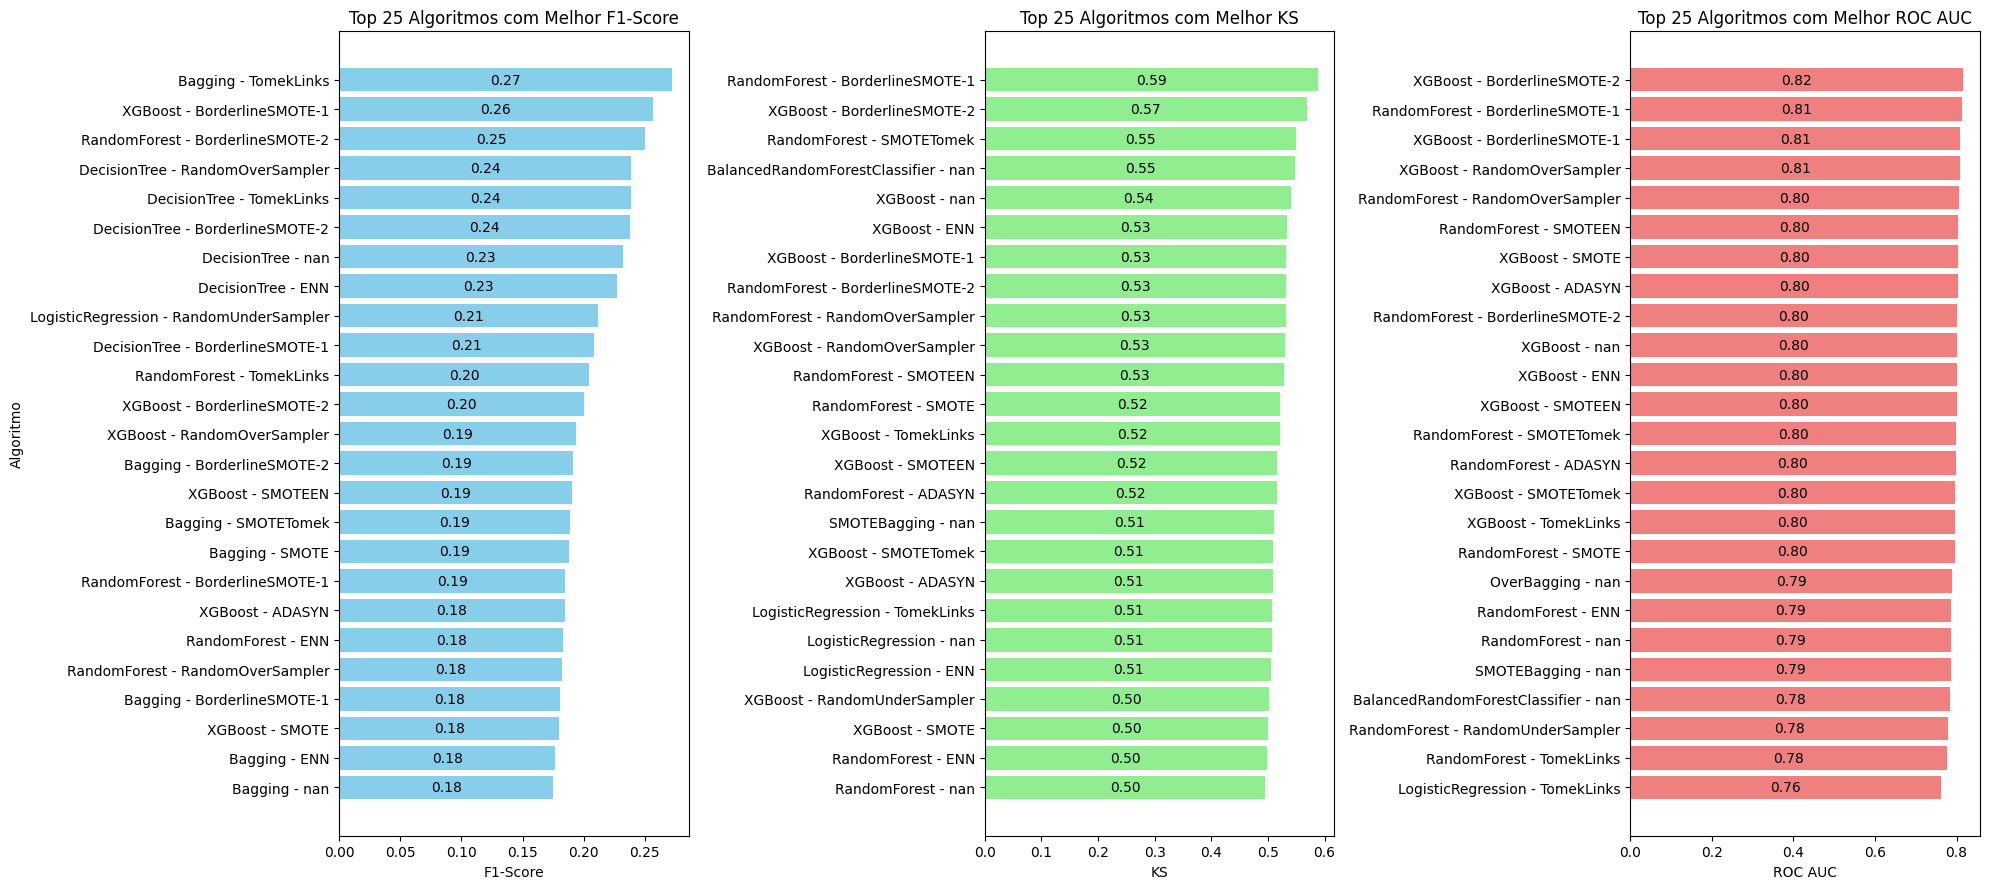

In [3]:
# Selecionar os top 10 algoritmos com base nas métricas F1-Score, KS e ROC AUC
top_10_f1 = combined_df.nlargest(25, 'F1-Score')
top_10_ks = combined_df.nlargest(25, 'KS')
top_10_rocauc = combined_df.nlargest(25, 'ROC AUC')

# Criar a figura e os eixos
fig, axes = plt.subplots(1, 3, figsize=(20, 9))

# Plotar F1-Score
bars = axes[0].barh(top_10_f1['Algoritmo_'], top_10_f1['F1-Score'], color='skyblue')
axes[0].set_xlabel('F1-Score')
axes[0].set_ylabel('Algoritmo')
axes[0].set_title('Top 25 Algoritmos com Melhor F1-Score')
axes[0].invert_yaxis()

# Adicionar os valores no meio das barras
for bar in bars:
    width = bar.get_width()
    axes[0].text(width / 2, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='center', va='center')

# Plotar KS
bars = axes[1].barh(top_10_ks['Algoritmo_'], top_10_ks['KS'], color='lightgreen')
axes[1].set_xlabel('KS')
axes[1].set_title('Top 25 Algoritmos com Melhor KS')
axes[1].invert_yaxis()

# Adicionar os valores no meio das barras
for bar in bars:
    width = bar.get_width()
    axes[1].text(width / 2, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='center', va='center')

# Plotar ROC AUC
bars = axes[2].barh(top_10_rocauc['Algoritmo_'], top_10_rocauc['ROC AUC'], color='lightcoral')
axes[2].set_xlabel('ROC AUC')
axes[2].set_title('Top 25 Algoritmos com Melhor ROC AUC')
axes[2].invert_yaxis()

# Adicionar os valores no meio das barras
for bar in bars:
    width = bar.get_width()
    axes[2].text(width / 2, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='center', va='center')

plt.tight_layout()
plt.show()